In [1]:
#!pip install tensorflow
#!pip install keras
#!pip install pandas-datareader
import tensorflow
import keras
#!pip install pandas
import pandas
import numpy

In [2]:
import pandas_datareader.data as web
import pandas as pd
import datetime
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from numpy import array
import sklearn
from sklearn import preprocessing
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.linear_model import HuberRegressor
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM


In [3]:
#start = datetime.datetime(2014, 1, 1)
#end = datetime.datetime(2020, 7, 24)

In [4]:
###axisgold = web.DataReader("AXISGOLD.NS", 'yahoo', start, end)
###bslgoldetf = web.DataReader("BSLGOLDETF.NS", 'yahoo', start, end)
#cangold = web.DataReader("CANGOLD.BO", 'yahoo', start, end)
#hfcmgetf = web.DataReader("HFCMFGETF.BO", 'yahoo', start, end)
#ipgetf = web.DataReader("IPGETF.BO", 'yahoo', start, end)
###idbigold = web.DataReader("IDBIGOLD.NS", 'yahoo', start, end)
#kotakgold = web.DataReader("KOTAKGOLD.NS", 'yahoo', start, end)
###qgoldhalf = web.DataReader("QGOLDHALF.NS", 'yahoo', start, end)
#relgold = web.DataReader("RELGOLD.BO", 'yahoo', start, end)
#religarego = web.DataReader("RELIGAREGO.BO", 'yahoo', start, end)
#setfgold = web.DataReader("SETFGOLD.NS", 'yahoo', start, end)
###goldshare = web.DataReader("GOLDSHARE.NS", 'yahoo', start, end)
###goldbees = web.DataReader("GOLDBEES.NS", 'yahoo', start, end)

In [5]:
kotakgold = pd.read_csv('KOTAKGOLD.csv')
###axisgold.to_csv('AXISGOLD.csv')
###bslgoldetf.to_csv('BSLGOLDETF.csv')
###idbigold.to_csv('IDBIGOLD.csv')
kotakgold.to_csv('KOTAKGOLD.csv')
###qgoldhalf.to_csv('QGOLDHALF.csv')
#setfgold.to_csv('SETFGOLD.csv')
####goldshare.to_csv('GOLDSHARE.csv')
###goldbees.to_csv('GOLDBEES.csv')

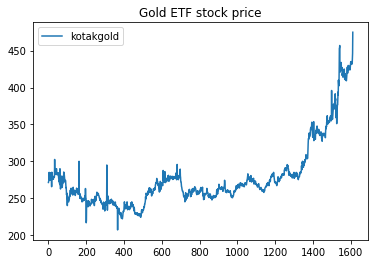

In [6]:
###axisgold['Open'].plot(label = 'axisgold', figsize= (15,7))
###bslgoldetf['Open'].plot(label = 'bslgoldetf')
###idbigold['Open'].plot(label = 'idbigold')
kotakgold['Open'].plot(label = 'kotakgold')
###qgoldhalf['Open'].plot(label = 'qgoldhalf')
###goldshare['Open'].plot(label = 'goldshare')
###goldbees['Open'].plot(label = 'goldbees')
plt.title('Gold ETF stock price')
plt.legend()

In [7]:
#We are going to predict the price of one Gold ETF below. Similarly all other predictions can also be made. Let us chose Axisgold ETF

In [8]:
# Select Adjusted close data
data = kotakgold[['Adj Close']]
print(data.shape)
data[-20:]

(1611, 1)


,Adj Close
1591,427.05
1592,430.85
1593,424.15
1594,423.80
1595,424.25
1596,425.30
1597,431.75
1598,434.60
1599,433.05
1600,433.90


In [9]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
data_scaled=scaler.fit_transform(np.array(data).reshape(-1,1))

In [10]:
print(data_scaled)

[[0.20843042]
 [0.21182344]
 [0.22668608]
 ...
 [0.93297252]
 [0.94691923]
 [1.        ]]


In [11]:
#Split data 80% training 20% testing

training_size=int(len(data_scaled)*0.8)
test_size=len(data_scaled)-training_size
train_data,test_data=data_scaled[0:training_size],data_scaled[training_size:len(data)]

In [12]:
training_size,test_size

(1288, 323)

In [13]:
train_data

array([[0.20843042],
       [0.21182344],
       [0.22668608],
       ...,
       [0.24417156],
       [0.24104917],
       [0.23938379]])

In [14]:
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return numpy.array(dataX), numpy.array(dataY)

In [15]:
#reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 1
x_train, y_train = create_dataset(train_data, time_step)
x_test, y_test = create_dataset(test_data, time_step)
#x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [16]:
#Regression coefficients
x_train_lr = x_train
y_train_lr = y_train
x_test_lr = x_test
y_test_lr = y_test

In [17]:
print(x_train_lr.shape), print(y_train_lr.shape)

(1286, 1)
(1286,)


(None, None)

In [18]:
print(x_test_lr.shape), print(y_test_lr.shape)


(321, 1)
(321,)


(None, None)

In [19]:
x_train_lr.shape, x_test_lr.shape

((1286, 1), (321, 1))

In [20]:
x_train_lr

array([[0.20843042],
       [0.21182344],
       [0.22668608],
       ...,
       [0.24666938],
       [0.24625316],
       [0.24417156]])

In [21]:
#Create models
#Create decision tree model
#modeltree = DecisionTreeRegressor()
#modeltree.fit(x_train, y_train)

#Create linear decision model
modellr = LinearRegression()
modellr.fit(x_train_lr, y_train_lr)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [22]:
# The coefficient
print('Slope: ', np.asscalar(np.squeeze(modellr.coef_)))
# The Intercept
print('Intercept: ', modellr.intercept_)

Slope:  0.9922479833026986
Intercept:  0.0012276413269114994


/home/ec2-user/anaconda3/envs/pytorch_p36/lib/python3.6/site-packages/ipykernel/__main__.py:2: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  from ipykernel import kernelapp as app


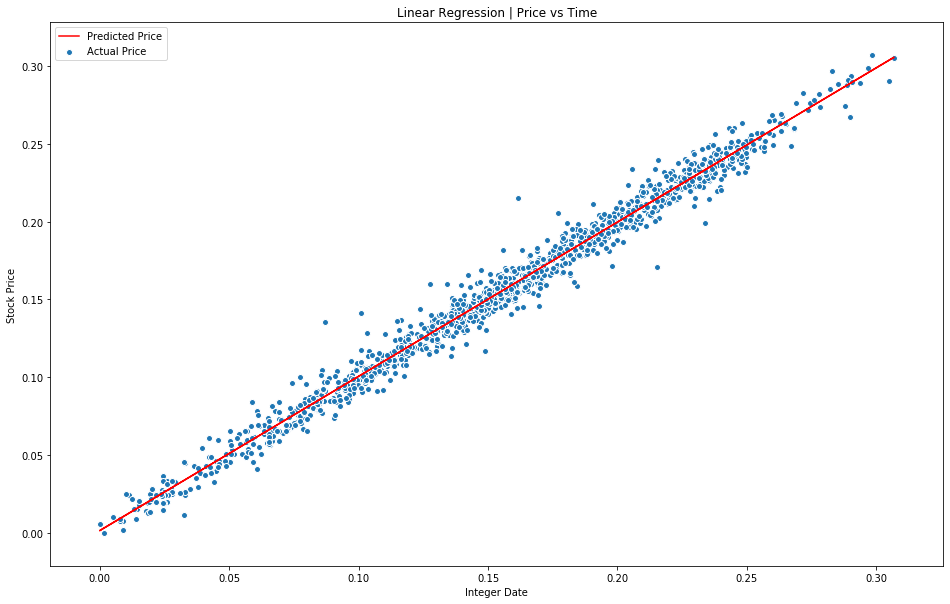

In [23]:
# Train set graph
plt.figure(1, figsize=(16,10))
plt.title('Linear Regression | Price vs Time')
plt.scatter(x_train_lr, y_train_lr, edgecolor='w', label='Actual Price')
plt.plot(x_train_lr, modellr.predict(x_train_lr), color='r', label='Predicted Price')
plt.xlabel('Integer Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

In [24]:
# Create test arrays
x_test_lr

array([[0.23459613],
       [0.23022483],
       [0.23168197],
       [0.24396333],
       [0.24292253],
       [0.24562858],
       [0.24833476],
       [0.24895922],
       [0.24708573],
       [0.24271442],
       [0.23584517],
       [0.23730219],
       [0.22855957],
       [0.23875933],
       [0.23480437],
       [0.23792677],
       [0.24708573],
       [0.24354698],
       [0.24895922],
       [0.23709408],
       [0.23938379],
       [0.24583682],
       [0.25083258],
       [0.23834299],
       [0.24417156],
       [0.24125728],
       [0.24208997],
       [0.25562036],
       [0.25249796],
       [0.24875098],
       [0.23813488],
       [0.22731054],
       [0.22439638],
       [0.2237718 ],
       [0.22606163],
       [0.23084928],
       [0.23084928],
       [0.23501248],
       [0.23480437],
       [0.23043294],
       [0.24271442],
       [0.25208161],
       [0.25666116],
       [0.26311406],
       [0.26457121],
       [0.25874276],
       [0.24916733],
       [0.259

In [25]:
# Generate array with predicted values
train_pred_lr = modellr.predict(x_train_lr)
test_pred_lr = modellr.predict(x_test_lr)

In [26]:
#model accurcy
#results_lr = model.evaluate(x_test_lr, y_test_lr, batch_size=128)
#print("test loss, test acc:", results_lr)

In [27]:
# reshape input to be [samples, time steps, features] which is required for LSTM
train_pred_lr =train_pred_lr.reshape(train_pred_lr.shape[0], 1)
test_pred_lr = test_pred_lr.reshape(test_pred_lr.shape[0], 1)

In [28]:
train_pred_lr=scaler.inverse_transform(train_pred_lr)
test_pred_lr=scaler.inverse_transform(test_pred_lr)

In [29]:
y_train_lr =y_train_lr.reshape(y_train_lr.shape[0], 1)
y_test_lr = y_test_lr.reshape(y_test_lr.shape[0], 1)

In [30]:
y_train_lr=scaler.inverse_transform(y_train_lr)
y_test_lr=scaler.inverse_transform(y_test_lr)

In [31]:
print(x_train_lr)
print(train_pred_lr)

[[0.20843042]
 [0.21182344]
 [0.22668608]
 ...
 [0.24666938]
 [0.24625316]
 [0.24417156]]
[[272.27176503]
 [273.08044961]
 [276.62278216]
 ...
 [281.38556037]
 [281.28635978]
 [280.79023579]]


In [32]:
#plt.plot(x_test_lr)
#plt.plot(test_pred_lr)
#plt.plot(x_train_lr)
#plt.plot(train_pred_lr)

In [33]:
print(y_test_lr.shape) 
print(train_pred_lr.shape)
print(y_train_lr.shape)
print(test_pred_lr.shape)

(321, 1)
(1286, 1)
(1286, 1)
(321, 1)


In [34]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
print("Training Linear Regression Root Mean Squared error is:{}". format(math.sqrt(mean_squared_error(y_train_lr,train_pred_lr))))
print("Training Linear Regression Mean Squared error is {}".format(mean_squared_error(y_train_lr,train_pred_lr)))

print("Test Linear Regression Root Mean Squared error is:{}". format(math.sqrt(mean_squared_error(y_test_lr,test_pred_lr))))
print("Test Linear Regression Mean Squared error is {}".format(mean_squared_error(y_test_lr,test_pred_lr)))


Training Linear Regression Root Mean Squared error is:1.942798495436863
Training Linear Regression Mean Squared error is 3.774465993871738
Test Linear Regression Root Mean Squared error is:4.546994743199361
Test Linear Regression Mean Squared error is 20.675161194682623


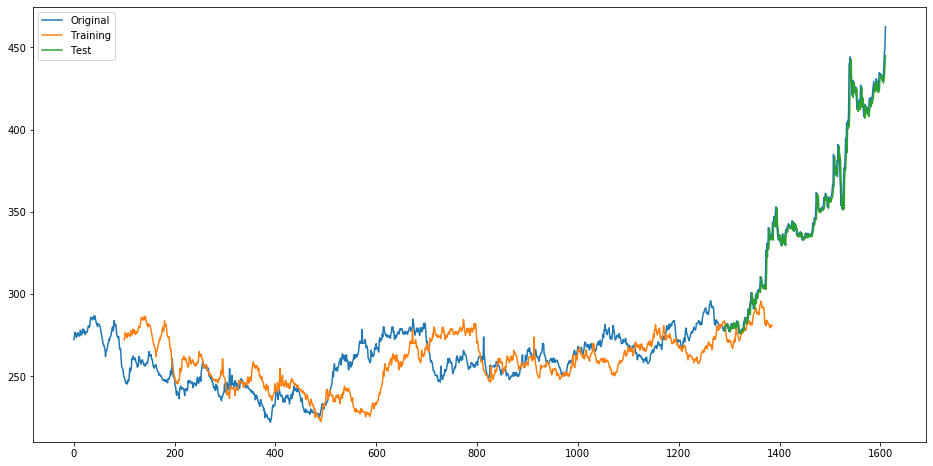

In [35]:
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(data_scaled)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_pred_lr)+look_back, :] = train_pred_lr
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(data_scaled)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_pred_lr)+(look_back*2)-196:len(data)+100, :] = test_pred_lr
# plot baseline and predictions
plt.figure(figsize = (16,8))
plt.plot(scaler.inverse_transform(data_scaled))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.legend(['Original','Training', 'Test'])
plt.show()

In [36]:
#data_1 = pd.read_csv('KOTAKGOLD.csv')

In [37]:
#data = data_1[['Adj Close']]

In [38]:
#from sklearn.preprocessing import MinMaxScaler
#scaler=MinMaxScaler(feature_range=(0,1))
#data=scaler.fit_transform(np.array(data).reshape(-1,1))

In [39]:
#Split data 80% training 20% testing

#training_size=int(len(data)*0.8)
#test_size=len(data)-training_size
#train_data,test_data=data[0:training_size],data[training_size:len(data)]

In [40]:
#def create_dataset(dataset, time_step=1):
#    dataX, dataY = [], []
#   for i in range(len(dataset)-time_step-1):
#        a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
#        dataX.append(a)
#        dataY.append(dataset[i + time_step, 0])
#    return numpy.array(dataX), numpy.array(dataY)

In [41]:
#reshape into X=t,t+1,t+2,t+3 and Y=t+4
#time_step = 1
#x_train, y_train = create_dataset(train_data, time_step)
#x_test, y_test = create_dataset(test_data, time_step)
#x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [42]:
#LSTM coefficients
x_train_lstm = x_train
y_train_lstm = y_train
x_test_lstm = x_test
y_test_lstm = y_test

In [43]:
# reshape input to be [samples, time steps, features] which is required for LSTM
x_train_lstm =x_train_lstm.reshape(x_train_lstm.shape[0],x_train_lstm.shape[1] , 1)
x_test_lstm = x_test_lstm.reshape(x_test_lstm.shape[0],x_test_lstm.shape[1] , 1)

In [44]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dropout, Activation

In [45]:
#from keras import backend as K
#K.set_image_data_format('channels_last')  
#keras.backend.image_data_format()  

In [46]:
model=Sequential()
model.add(LSTM(5,return_sequences=True,input_shape=(5,1)))
model.add(Dropout(0.5))
#model.add(LSTM(100,return_sequences=True))
#model.add(Dropout(0.5))
#model.add(LSTM(100,return_sequences=True))
#model.add(Dropout(0.5))
model.add(LSTM(5))
#model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation("linear"))
model.compile(loss='mse',optimizer='adam')

In [47]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 5, 5)              140       
_________________________________________________________________
dropout (Dropout)            (None, 5, 5)              0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 5)                 220       
_________________________________________________________________
dense (Dense)                (None, 1)                 6         
_________________________________________________________________
activation (Activation)      (None, 1)                 0         
Total params: 366
Trainable params: 366
Non-trainable params: 0
_________________________________________________________________


In [48]:
history = model.fit(x_train_lstm,y_train_lstm,validation_data=(x_test_lstm,y_test_lstm),epochs=50,batch_size=64,verbose=1)

Epoch 1/50
21/21 [==============================] - 1s 38ms/step - loss: 0.0232 - val_loss: 0.2827
Epoch 2/50
21/21 [==============================] - 0s 3ms/step - loss: 0.0148 - val_loss: 0.2467
Epoch 3/50
21/21 [==============================] - 0s 3ms/step - loss: 0.0088 - val_loss: 0.2144
Epoch 4/50
21/21 [==============================] - 0s 3ms/step - loss: 0.0054 - val_loss: 0.1883
Epoch 5/50
21/21 [==============================] - 0s 3ms/step - loss: 0.0040 - val_loss: 0.1713
Epoch 6/50
21/21 [==============================] - 0s 3ms/step - loss: 0.0038 - val_loss: 0.1635
Epoch 7/50
21/21 [==============================] - 0s 3ms/step - loss: 0.0037 - val_loss: 0.1601
Epoch 8/50
21/21 [==============================] - 0s 3ms/step - loss: 0.0037 - val_loss: 0.1591
Epoch 9/50
21/21 [==============================] - 0s 3ms/step - loss: 0.0037 - val_loss: 0.1578
Epoch 10/50
21/21 [==============================] - 0s 3ms/step - loss: 0.0036 - val_loss: 0.1565
Epoch 11/50
21/21 

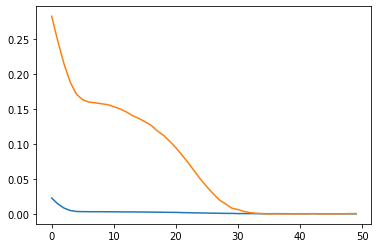

In [49]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

In [50]:
### Lets Do the prediction and check performance metrics
train_pred_lstm=model.predict(x_train_lstm)
test_pred_lstm=model.predict(x_test_lstm)

In [51]:
##Transformback to original form
train_pred_lstm=scaler.inverse_transform(train_pred_lstm)
test_pred_lstm=scaler.inverse_transform(test_pred_lstm)


In [52]:
# reshape input to be [samples, time steps, features] which is required for LSTM
y_train_lstm =y_train_lstm.reshape(y_train_lstm.shape[0], 1)
y_test_lstm = y_test_lstm.reshape(y_test_lstm.shape[0], 1)
y_train_lstm=scaler.inverse_transform(y_train_lstm)
y_test_lstm=scaler.inverse_transform(y_test_lstm)

In [53]:
print(y_test_lstm)
print(test_pred_lstm)

[[277.6000061]
 [277.9500122]
 [280.8999939]
 [280.6499939]
 [281.2999878]
 [281.9500122]
 [282.1000061]
 [281.6499939]
 [280.6000061]
 [278.9500122]
 [279.2999878]
 [277.2000122]
 [279.6499939]
 [278.7000122]
 [279.4500122]
 [281.6499939]
 [280.7999878]
 [282.1000061]
 [279.25     ]
 [279.7999878]
 [281.3500061]
 [282.5499878]
 [279.5499878]
 [280.9500122]
 [280.25     ]
 [280.4500122]
 [283.7000122]
 [282.9500122]
 [282.0499878]
 [279.5      ]
 [276.8999939]
 [276.2000122]
 [276.0499878]
 [276.6000061]
 [277.75     ]
 [277.75     ]
 [278.75     ]
 [278.7000122]
 [277.6499939]
 [280.6000061]
 [282.8500061]
 [283.9500122]
 [285.5      ]
 [285.8500061]
 [284.4500122]
 [282.1499939]
 [284.5499878]
 [285.1000061]
 [288.8999939]
 [291.       ]
 [288.7000122]
 [287.7999878]
 [294.25     ]
 [294.8500061]
 [296.7999878]
 [300.9500122]
 [295.5499878]
 [294.1000061]
 [296.9500122]
 [291.2000122]
 [291.8999939]
 [296.7999878]
 [294.5      ]
 [297.6000061]
 [300.1000061]
 [297.4500122]
 [297.9500

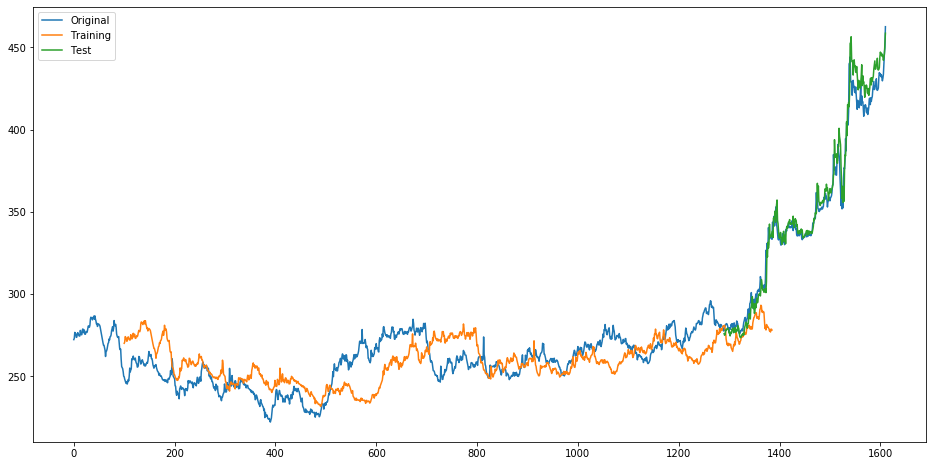

In [54]:
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(data_scaled)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_pred_lstm)+look_back, :] = train_pred_lstm
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(data_scaled)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_pred_lstm)+(look_back*2)-196:len(data)+100, :] = test_pred_lstm
# plot baseline and predictions
plt.figure(figsize = (16,8))
plt.plot(scaler.inverse_transform(data_scaled))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.legend(['Original','Training', 'Test'])
plt.show()

In [78]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
print("Training LSTM Root Mean Squared error is:{}". format(math.sqrt(mean_squared_error(y_train_lstm,train_pred_lstm))))
print("Traning LSTM Mean Squared error is {}".format(mean_squared_error(y_train_lstm,train_pred_lstm)))

Training LSTM Root Mean Squared error is:3.2619863586938256
Traning LSTM Mean Squared error is 10.640555004304604


In [ ]:
### Test Data RMSE
print("Test LSTM Root Mean Squared error is:{}". format(math.sqrt(mean_squared_error(y_test_lstm,test_pred_lstm))))
print("Test LSTM Mean Squared error is {}".format(mean_squared_error(y_test_lstm,test_pred_lstm)))


In [57]:
results_lstm = model.evaluate(x_test_lstm, y_test_lstm, batch_size=128)
print("test loss, test acc:", results_lstm)

3/3 [==============================] - 0s 1ms/step - loss: 124658.6797
test loss, test acc: 124658.6796875


### shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(data)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(data)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)-196:len(data)+100, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(data))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.legend(['Original','Training', 'Test'])
plt.show()


In [58]:
len(data_scaled)
data_scaled

array([[0.20843042],
       [0.21182344],
       [0.22668608],
       ...,
       [0.93297252],
       [0.94691923],
       [1.        ]])

In [59]:
#Predicting to next 1 day data using previous 7 days
x_input=data_scaled[len(data_scaled)-1:].reshape(1,-1)
x_input.shape

(1, 1)

In [60]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [61]:
len(temp_input)

1

In [62]:
temp_input

[1.0]

In [63]:
x_input

array([[1.]])

In [64]:
from numpy import array

lst_output=[]
n_steps=1
i=0
while(i<7):
    
    if(len(temp_input)>1):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[1.0453857]
2
1 day input [1.04538572]
1 day output [[1.0850842]]
2 day input [1.0850842]
2 day output [[1.1183586]]
3 day input [1.11835861]
3 day output [[1.1452171]]
4 day input [1.14521706]
4 day output [[1.1662196]]
5 day input [1.16621959]
5 day output [[1.1822274]]
6 day input [1.18222737]
6 day output [[1.1941859]]
[[1.045385718345642], [1.0850841999053955], [1.1183586120605469], [1.1452170610427856], [1.1662195920944214], [1.182227373123169], [1.1941858530044556]]


In [65]:
day_new=np.arange(1,len(lst_output)+1)
day_pred=np.arange(len(lst_output)+1,len(lst_output)+8)

In [66]:
len(day_new)

7

In [67]:
lst_output

[[1.045385718345642],
 [1.0850841999053955],
 [1.1183586120605469],
 [1.1452170610427856],
 [1.1662195920944214],
 [1.182227373123169],
 [1.1941858530044556]]

In [68]:
day_pred.shape

(7,)

In [69]:
tx = scaler.inverse_transform(lst_output)
tx

array([[473.40164941],
       [482.93722455],
       [490.92973825],
       [497.38113761],
       [502.42594551],
       [506.27101446],
       [509.14344129]])

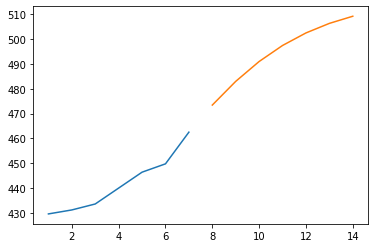

In [70]:
plt.plot(day_new,scaler.inverse_transform(data_scaled[len(data_scaled)-7:]))
plt.plot(day_pred,tx)

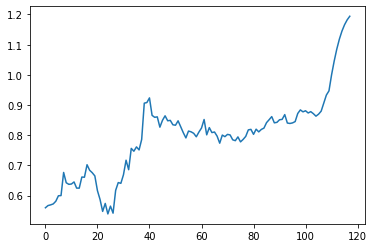

In [71]:
df3=data_scaled.tolist()
df3.extend(lst_output)
plt.plot(df3[1500:])

In [72]:
df3=scaler.inverse_transform(df3).tolist()

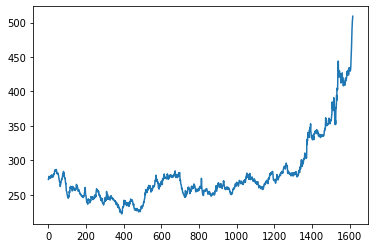

In [73]:
plt.plot(df3)

In [74]:
df3[-40:]

[[418.7],
 [419.1],
 [415.15],
 [419.25],
 [417.1],
 [419.05],
 [420.1],
 [424.45],
 [426.8],
 [429.25],
 [424.3],
 [424.7],
 [426.75],
 [427.05],
 [430.85],
 [424.15],
 [423.8],
 [424.25],
 [425.3],
 [431.75],
 [434.6],
 [433.05],
 [433.9],
 [432.15],
 [433.2],
 [431.6],
 [429.6],
 [431.2],
 [433.6],
 [440.0],
 [446.4],
 [449.75],
 [462.5],
 [473.4016494059275],
 [482.93722455351497],
 [490.9297382500317],
 [497.38113761230426],
 [502.4259455057993],
 [506.2710144592803],
 [509.14344128969407]]

In [75]:
#train_pred_lr = modellr.predict(x_train_lr)
#test_pred_lr = modellr.predict(x_test_lr)
#train_pred_lstm=model.predict(x_train_lstm)
#test_pred_lstm=model.predict(x_test_lstm)

In [76]:
print(train_pred_lr-y_train_lr)

[[-0.90822767]
 [-3.66955039]
 [ 0.27277606]
 ...
 [-0.06445183]
 [ 0.33634758]
 [ 0.59022359]]


In [77]:
print(train_pred_lstm-x_train_lstm)

[[[269.92541967]
  [270.67334448]
  [273.99313818]
  ...
  [278.56619726]
  [278.46967016]
  [277.98782812]]

 [[269.92202666]
  [270.66995146]
  [273.98974516]
  ...
  [278.56280425]
  [278.46627715]
  [277.98443511]]

 [[269.90716401]
  [270.65508882]
  [273.97488252]
  ...
  [278.5479416 ]
  [278.4514145 ]
  [277.96957246]]

 ...

 [[269.88718072]
  [270.63510552]
  [273.95489922]
  ...
  [278.5279583 ]
  [278.4314312 ]
  [277.94958916]]

 [[269.88759693]
  [270.63552174]
  [273.95531544]
  ...
  [278.52837452]
  [278.43184742]
  [277.95000538]]

 [[269.88967853]
  [270.63760334]
  [273.95739704]
  ...
  [278.53045612]
  [278.43392902]
  [277.95208698]]]
